<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Etude AdultCensus en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a>

**Résumé**
Analyse de données extraites d'un recensement aux USA de 1994. Préparation des données, exploration élémentaire et multidimensionnelle ([ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)), [classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf). L'objectif est de préparer l'[étape suivante](https://github.com/wikistat/Apprentissage/tree/master/Adult-Census) consistant à modéliser / prévoir le niveau de revenu.

## Introduction
### Objectif
A refaire

### Présentation des données
#### Les variables

Num| Libellé |	Ensemble de valeurs
-|--|--|--
1|`Age`|	real
2|	`workClass`|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
3|	`fnlwgt`|	real
4|	`education`|	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
5|	`educNum`|	integer
6|	`mariStat`|	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
7|	`occup`|	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
8|	`relationship`|	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
9|	`origEthn`|	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
10|	`sex`|	Female, Male
11|	`capitalGain`|	real  
12|	`capitalLoss`|	real
13|	`hoursWeek`|	real
14|	`nativCountry`|	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
15|	`income`|		>50K, <=50K



# <FONT COLOR="Red">Épisode 1 <i>Data Munging </i></font> 
## Lecture et prétraitement  des données
Les données sont disponibles dans le répertoire de ce calepin et chargées en même temps.

Même si les données sont déjà extraites par échantillonnage d'une très grande base, elles nécessitent un travail prémiminaire (*data munging*) pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables.  Ce travail préliminaire, souvent long et fastidieux, nécessite d'y consacer beaucoup de temps et de rigueur afin de s'assurer de la qualité finale des résultats. 

Il fait appel à des outils classiques de statistique descriptive. 

Les données sont anonymisées et datent du siècle dernier, elles n'ont plus d'intérêt "commercial". De façon générale, plutôt que de conserver tous les fichiers de données intermédiaires à une étude, ce qui peut nécessiter beaucoup d'espace disque, il est important, voire crucial, d'archiver *tous* les programmes intermédiaires de saisie, sélection, transformation des données. En effet, en cas de problème ou même simplement d'un mauvais choix méthodologique, il faut pouvoir rapidement repartir d'une étape précédente. 

La production d'un calepin aide à cette mémoire lors de l'analyse préliminaire mais ne constitue pas un code opérationnel.

### Lecture des données

In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# Données déjà nettoyées, à refaire, on le garde pour vérification
path=""
adult = pd.read_table(path + 'adultCensus.csv', sep=',', header=0, index_col=None)
idx = pd.Int64Index(range(adult.shape[0]))
names = list(adult)
print(adult)
print(names)
adult = pd.DataFrame(index = idx, data = adult, columns=names)
adult.head()

In [57]:
path=""
colNames=["age", "workClass", "fnlwgt", "education", "educNum","mariStat", "occup", "relationship", "origEthn","sex", "capitalGain", "capitalLoss", "hoursWeek","nativCountry", "income"]
adult = pd.read_table(path + 'adult.data', sep=',', header=None, index_col=None)
adult.columns = colNames
adult

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Toutes les colonnes ont bien été importées, la première correspond à un identifiant unique pour chaque personne recensée.
On va à présent préparer les données en commençant par affecter le bon type aux variables qualitatives.

In [58]:
# Ici les noms des variables sont suffisamment explicites, il n'est pas utile de les renommer.
def create_categorical_data(df, column_name) : #, cat_name_dic):
    cat_columns = pd.Categorical(df[column_name],ordered=False)
    #new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns #.rename_categories(new_categorie)

In [59]:
# mariStat
cat_name_dic = {" Never-married" : "Never-Married", " Married-AF-spouse" : "Married", 
                                           " Married-civ-spouse" : "Married", " Married-spouse-absent" : "Not-Married",
                                          " Separated" : "Not-Married", " Divorced" : "Not-Married", " Widowed" : "Widowed"}
adult['mariStat'] = adult.mariStat.map(cat_name_dic)

# nativeCountry
cat_country = {" Cambodia" : "SE-Asia", " Canada" : "British-Commonwealth", " China" : "China", " Columbia" : "South-America", " Cuba" : "Other",
              " Dominican-Republic" : "Latin-America", " Ecuador" : "South-America", " El-Salvador" : "South-America",
              " England" : "British-Commonwealth", " France" : "Euro_1", " Germany" : "Euro_1", " Greece" : "Euro_2", 
              " Guatemala" : "Latin-America", " Haiti" : "Latin-America", " Holand-Netherlands" : "Euro_1", " Honduras" : "Latin-America",
              " Hong" : "China", " Hungary" : "Euro_2", " India" : "British-Commonwealth", " Iran" : "Other", " Ireland" : "British-Commonwealth",
              " Italy" : "Euro_1", " Jamaica" : "Latin-America", " Japan" : "Other", " Laos" : "SE-Asia", " Mexico" : "Latin-America",
              " Nicaragua" : "Latin-America", " Outlying-US(Guam-USVI-etc)" : "Latin-America", " Peru" : "South-America", 
              " Philippines" : "SE-Asia", " Poland" : "Euro_2", " Portugal" : "Euro_2", " Puerto-Rico" : "Latin-America",
              " Scotland" : "British-Commonwealth", " South" : "Euro_2", " Taiwan" : "China", " Thailand" : "SE-Asia",
              " Trinadad&Tobago" : "Latin-America", " Vietnam" : "SE-Asia", " United-States" : "United-States",
              " Yugoslavia" : "Euro_2"}
adult["nativCountry"] = adult.nativCountry.map(cat_country)#.fillna(adult.nativCountry)


# education
cat_educ = {" 10th" : "Dropout", " 11th" : "Dropout", " 12th" : "Dropout", " 1st-4th" : "Dropout", " 5th-6th" : "Dropout",
           " 7th-8th" : "Dropout", " 9th" : "Dropout", " Assoc-acdm" : "Associates", " Assoc-voc" : "Associates", 
           " Bachelors" : "Bachelors", " Doctorate" : "Doctorate", " HS-grad" : "HS-grad", " Masters" : "Masters",
           " Preschool" : "Dropout", " Prof-school" : "Prof-School", " Some-college" : "HS-Graduate"}
adult["education"] = adult.education.map(cat_educ)


# workClass
cat_work = {" Federal-gov" : "Federal-Govt", " Local-gov" : "Other-Govt", " State-gov" : "Other-Govt", " Private" : "Private",
           " Self-emp-inc" : "Self-Employed", " Self-emp-not-inc" : "Self-Employed", " Without-pay" : "Not-Working",
           " Never-worked" : "Not-Working"}
adult["workClass"] = adult.workClass.map(cat_work)


# occup
cat_occup = {" Adm-clerical" : "Admin", " Craft-repair" : "Blue-Collar", " Exec-managerial" : "White-Collar",
            " Farming-fishing" : "Blue-Collar", " Handlers-cleaners" : "Blue-Collar", " Machine-op-inspct" : "Blue-Collar",
            " Other-service" : "Service", " Priv-house-serv" : "Service", " Prof-specialty" : "Professional",
            " Protective-serv" : "Other-occups", " Sales" : "Sales", " Tech-support" : "Other-occups", " Transport-moving" : "Blue-Collar"}
adult["occup"] = adult.occup.map(cat_occup)


# origEthn
cat_orig = {" White" : "White", " Black" : "Black", " Amer-Indian-Eskimo" : "Amer-Indian", " Asian-Pac-Islander" : "Asian",
            " Other" : "Other"}
adult["origEthn"] = adult.origEthn.map(cat_orig)

adult["LcapitalGain"] = np.log(1 + adult["capitalGain"])
adult["LcapitalLoss"] = np.log(1 + adult["capitalLoss"])


# capital
def quantileCapitalGain(capital):
    result = ""
    if type(capital) != int :
        result = np.nan
    elif capital <= 0 :
        result = "None"
    elif capital <= np.median(adult[adult["capitalGain"] > 0]["capitalGain"]) :
        result = "cgLow"
    else :
        result = "cgHigh"
    return result

adult["capitalGain"] = list(map(quantileCapitalGain, adult.capitalGain))

def quantileCapitalLoss(capital):
    result = ""
    if type(capital) != int :
        result = np.nan
    elif capital <= 0 :
        result = "None"
    elif capital <= np.median(adult[adult["capitalLoss"] > 0]["capitalLoss"]):
        result = "clLow"
    else :
        result = "clHigh"
    return result
adult["capitalLoss"] = list(map(quantileCapitalLoss, adult.capitalLoss))

adult = adult[np.logical_not(adult.isnull().any(axis=1))]

adult


,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,<=50K,7.684784,0.000000
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,<=50K,0.000000,0.000000
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,<=50K,0.000000,0.000000
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,<=50K,0.000000,0.000000
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,<=50K,0.000000,0.000000
5,37,Private,284582,Masters,14,Married,White-Collar,Wife,White,Female,None,None,40,United-States,<=50K,0.000000,0.000000
6,49,Private,160187,Dropout,5,Not-Married,Service,Not-in-family,Black,Female,None,None,16,Latin-America,<=50K,0.000000,0.000000
7,52,Self-Employed,209642,HS-grad,9,Married,White-Collar,Husband,White,Male,None,None,45,United-States,>50K,0.000000,0.000000
8,31,Private,45781,Masters,14,Never-Married,Professional,Not-in-family,White,Female,cgHigh,None,50,United-States,>50K,9.552866,0.000000
9,42,Private,159449,Bachelors,13,Married,White-Collar,Husband,White,Male,cgLow,None,40,United-States,>50K,8.552367,0.000000


In [60]:
for name in ["workClass", "education", "mariStat", "occup", "relationship", "origEthn", "sex", "capitalGain", "capitalLoss", "nativCountry"] :
    adult[name] = create_categorical_data(adult, name)

In [61]:
adult

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,<=50K,7.684784,0.000000
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,<=50K,0.000000,0.000000
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,<=50K,0.000000,0.000000
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,<=50K,0.000000,0.000000
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,<=50K,0.000000,0.000000
5,37,Private,284582,Masters,14,Married,White-Collar,Wife,White,Female,None,None,40,United-States,<=50K,0.000000,0.000000
6,49,Private,160187,Dropout,5,Not-Married,Service,Not-in-family,Black,Female,None,None,16,Latin-America,<=50K,0.000000,0.000000
7,52,Self-Employed,209642,HS-grad,9,Married,White-Collar,Husband,White,Male,None,None,45,United-States,>50K,0.000000,0.000000
8,31,Private,45781,Masters,14,Never-Married,Professional,Not-in-family,White,Female,cgHigh,None,50,United-States,>50K,9.552866,0.000000
9,42,Private,159449,Bachelors,13,Married,White-Collar,Husband,White,Male,cgLow,None,40,United-States,>50K,8.552367,0.000000


On a maintenant bien nettoyé les données, il ne devrait plus rester de valeurs non affectées ni d'observations incohérentes. On va à présent créer de nouvelles variables.

In [62]:
adult["ageQ"] = pd.qcut(adult.age, 5, labels=["Ag1", "Ag2", "Ag3", "Ag4", "Ag5"])

adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,<=50K,7.684784,0.0,Ag3
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,<=50K,0.000000,0.0,Ag4
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,<=50K,0.000000,0.0,Ag3
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,<=50K,0.000000,0.0,Ag5
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,<=50K,0.000000,0.0,Ag2


A présent on va rendre la variable `hoursWeek` qualitative en définissant les différentes classes.

In [63]:
adult["hoursWeekQ"] = pd.cut(adult.hoursWeek, bins=np.array([0, 39, 41, 100]), labels=["HW1", "HW2", "HW3"])

adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,<=50K,7.684784,0.0,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,<=50K,0.000000,0.0,Ag4,HW1
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,<=50K,0.000000,0.0,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,<=50K,0.000000,0.0,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,<=50K,0.000000,0.0,Ag2,HW2


In [64]:
def create_categorical_data_rename(df, column_name, cat_name_dic):
    cat_columns = pd.Categorical(df[column_name],ordered=False)
    new_categorie = [cat_name_dic[old_name] for old_name in cat_columns.categories]
    return cat_columns.rename_categories(new_categorie)

In [65]:
adult["income"] = create_categorical_data_rename(adult, "income", {" <=50K" : "incLow", " >50K" : "incHigh"})

In [66]:
adult.head()

,age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,incLow,7.684784,0.0,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,incLow,0.000000,0.0,Ag4,HW1
2,38,Private,215646,HS-grad,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,incLow,0.000000,0.0,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,incLow,0.000000,0.0,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,incLow,0.000000,0.0,Ag2,HW2


In [67]:
adult["education"].describe()

count       30153
unique          8
top       HS-grad
freq         9836
Name: education, dtype: object

**Q** Quelle est la population étudiée ? Quel est l’échantillon ?

In [68]:
print(adult.shape)

(30153, 19)


On étudie les résultats d'un recensement portant sur 30153 adultes américains.

**Q** Commenter, justifier les différentes transformations opérées. Repérer les variables quantitatives, qualitatives. Certaines (`age`, `hoursWeek`) sont présentes sous les deux types. Beaucoup de modalités on déjà été regroupées, notamment celles de `nativCountry`, certaines variables sont rendues qualitatives (`capitalLoss` ou `Gain`).

Les modalités des variables `mariStat`, `nativCountry`, `education`, `workClass`, `occup` et `origin` ont été regroupées. 

Deux nouvelles variables `LcapitalGain` et `LcapitalLoss` sont créées et valent respectivement $\log (1 + capitalGain)$ et $\log (1 + capitalLoss)$.

Les deux variables `capitalGain` et `capitalLoss` sont rendues qualitatives et valent None, Low ou High suivant si elles sont négatives, inférieures à leur médiane ou supérieures.


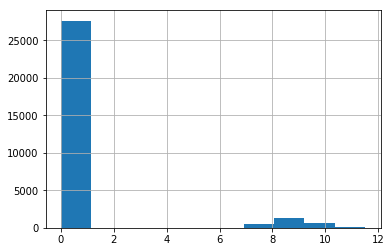

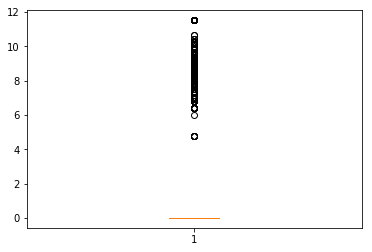

In [69]:
adult["LcapitalGain"].hist()
plt.show()
adult["capitalGain"].dtype
plt.boxplot(adult["LcapitalGain"])
plt.show()

**Q** Quels sont ces graphiques? Que dire de la transformation  opérée ? La variable CapitalLoss subit le même traitement.

Ces deux graphiques sont un histogramme et un boxplot de la variable `LcapitalGain`. La transformation permet de bien séparer les valeurs à None des autres. Cependant les deux modalités Low et High ne sont pas séparées sur ces graphiques. On remarque que la modalité None est très majoritaire dans l'échantillon.

In [70]:
adult["capitalGain"].describe()

count     30153
unique        3
top        None
freq      27615
Name: capitalGain, dtype: object

Certains couples de variables posent des problèmes. 

In [71]:
print(pd.crosstab(adult["relationship"], adult["sex"]))
print()
print(pd.crosstab(adult["education"], adult["educNum"]))
print()
print(pd.crosstab(adult["mariStat"], adult["relationship"]))
print()
print(pd.crosstab(adult["origEthn"], adult["nativCountry"]))

sex               Female   Male
relationship                   
 Not-in-family      3566   4156
 Husband               1  12460
 Wife               1405      1
 Own-child          1961   2504
 Unmarried          2463    749
 Other-relative      386    501

educNum      1    2    3    4    5    6     7    8     9     10    11    12  \
education                                                                     
Bachelors     0    0    0    0    0    0     0    0     0     0     0     0   
HS-grad       0    0    0    0    0    0     0    0  9836     0     0     0   
Dropout      45  151  288  557  455  820  1048  376     0     0     0     0   
Masters       0    0    0    0    0    0     0    0     0     0     0     0   
HS-Graduate   0    0    0    0    0    0     0    0     0  6676     0     0   
Associates    0    0    0    0    0    0     0    0     0     0  1307  1008   
Doctorate     0    0    0    0    0    0     0    0     0     0     0     0   
Prof-School   0    0    0    0  

**Q** Quel est ce problème général ? **Qu’est-ce qui va se passer si on en calcule l’analyse des correspondances ?** Quel est le problème plus spécifique des variables `relationship` et `sex`?

Le problème est que les informations apportées par ces couples de variables sont souvent redondantes. 

Il va se passer quoi ? 

Les valeurs Wife et Husband de la variable `relationship` portent déjà l'information de la variable `sex`. On remarque d'ailleurs une probable erreur de saisie avec un homme marqué Wife et une femme Husband. L'échantillon étant très large, on décide de supprimer ces deux observations.

In [72]:
adult = adult[(adult["sex"] != "Female") | (adult["relationship"] != "Husband")]
adult = adult[(adult["sex"] != "Male") | (adult["relationship"] != "Wife")]

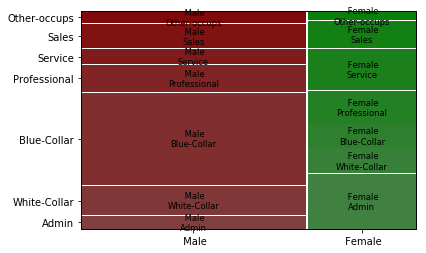

In [73]:
from statsmodels.graphics.mosaicplot import mosaic

mos = mosaic(adult, ["sex", "occup"])
plt.show()

**Q** Quel graphique ci-dessus?  Quelle interprétation ? Quel est le test ci-dessous ? Que doit vérifier la table pour que ce test soit valide ? Quelle est l’hypothèse H0 testée ? Conclusion.

Ce graphique est un mosaic plot de la variable `occup` en fonction de la variable `sex`. On observe que la variable `sex` est un facteur qui influe sur le type d'emploi occupé, en effet les emplois administratifs et de service représentent une part beaucoup plus ilmportante chez les femmes que chez les hommes. A l'inverse, la catégorie Blue Collar est sur-représentée chez les hommes. Les profils ne sont pas les mêmes pour les femmes et les hommes.

Le test ci-dessous est un test d'indépendance du Chi-deux, il permet de vérifier si les deux variables `occup` et `sex` sont indépendantes comme le suggèrent les profils.

L'hypothèse H0 est que les deux variables `occup` et `sex` sont indépendantes.

La p-valeur est très proche de 0, donc on rejette l'hypothèse et les variables ne sont pas indépendantes.

In [74]:
import scipy.stats
tab = pd.crosstab(adult["sex"], adult["occup"])
scipy.stats.chi2_contingency(tab)[1]

0.0

**Q** Quel est le graphique ci-dessous? Comment interpréter? Quel test permettrait de confirmer ? Que dire de l’intérêt de cette variable [fnlwgt](http://web.cs.wpi.edu/~cs4341/C00/Projects/fnlwgt) (Final sampling weight)?

Ce graphique est un boxplot de la variable `fnlwgt` en fonction de `income`. On observe que les personnes aux revenus plus faibles ont plus souvent un `fnlwgt` élevé. Cependant, les différents quantiles sont quasiment identiques pour les deux modalités de `income`. On pourrait réaliser un test d'indépendance du Chi-deux pour le vérifier.

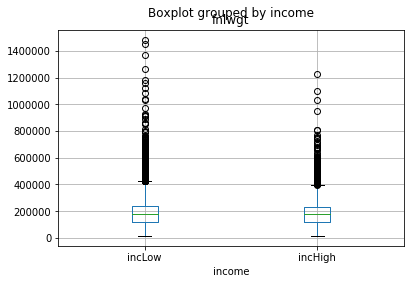

In [75]:
adult.boxplot(column="fnlwgt", by="income")
plt.show()

In [77]:
tab = pd.crosstab(index=adult["fnlwgt"], columns=adult["income"])
print(tab)
scipy.stats.chi2_contingency(tab)[1]

# Donne pas grand chose, on pourrait peut-être regrouper par classes ou faire un test sur les quantiles de fnlwgt pour 
# voir s'ils bougent en fonction de income ?


income   incLow  incHigh
fnlwgt                  
13769         1        0
14878         0        1
18827         1        0
19214         1        0
19302         2        3
19395         2        0
19410         1        0
19491         1        0
19520         1        0
19700         0        1
19752         1        0
19847         2        0
19899         0        1
19914         3        1
20057         2        0
20098         1        0
20101         1        0
20109         1        0
20179         0        1
20296         0        1
20308         1        0
20323         1        0
20333         0        1
20438         1        0
20469         1        0
20507         0        1
20511         1        0
20534         2        1
20676         1        0
20728         1        0
...         ...      ...
761006        1        0
766115        1        0
767403        0        1
791084        1        0
795830        1        0
799281        1        0
806552        0        1


3.7604052551244877e-06

**Q** Que dire dans la figure ci-dessous de la liaison entre les variables `educNum` et `age` et de la localisation des points noirs (>50k€) par rapport aux rouges (<50k€) ?

In [ ]:
col = adult["income"].map({"incHigh":'black', "incLow":'r'})
adult.plot.scatter(x="age", y="educNum", c=col)
plt.show()

On observe que les hauts revenus correspondent généralement aux personnes avec un haut niveau d'éducation et ayant entre 35 et 65 ans.

## 3 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)
**Q** Que représente la figure ci-dessous? 

In [ ]:
# nrow(as.vector(table(dataBase[,"age"],dataBase[,"educNum"])))

# Donne rien sur Rstudio, à tester à l'INSA

**Q** Quelle est le graphe ci-dessous? Quel est le cercle?  A quoi sert-il ?

Ce graphe est la carte factorielle associée aux deux premières composantes de l'ACP. Elle permet de visualiser à quel axe contribue chaque variable. (moyen sûr, à vérifier).

Le cercle des corrélations permet de voir à quel point les variables sont bien représentées sur les deux plans factoriels, plus la flèche est proche du cercle plus la variable est bien représentée.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# définition de la commande
pca = PCA()
# Liste des variables quantitatives
quantit = [name for name in list(adult) if adult[name].dtype.name != "category"]
# Sélection des variables quantitatives
dat = adult[quantit]
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
C = pca.fit(data).transform(data)

In [ ]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

**Q** La représentation ci-dessous montre un artefact avec 3 paquets d’individus. A quoi est dû cet artéfact ? Est-il utile à la compréhension des données ? 

Hélas y'a pas le modèle sur Visa, va falloir se débrouiller sans copier-coller.



In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Première composante principale', fontsize = 15)
ax.set_ylabel('Deuxième composante principale', fontsize = 15)
ax.set_title('ACP à deux composantes', fontsize = 20)
plt.scatter(C[:,0], C[:,1])
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(5 * i, 5 * j, nom)
    plt.arrow(0,0,5 * i, 5 * j,color='r')
plt.show()

Pas dans le même sens que sous R, c'est normal ? Sinon on retrouve bien les trois paquets, cela semble être dû au fait que le gain ou la perte de capital est une variable très influente, c'est l'axe qui permet de séparer les trois groupes.

In [ ]:
# Eboulis des valeurs propres
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

On observe un coude au niveau de la deuxième valeur propre, ce qui justifie de ne garder que les deux premières composantes principales pour l'ACP.

## 4 [Analyse factorielle des correspondances](http://wikistat.fr/pdf/st-m-explo-afc.pdf) de la table `occup` *vs.* `education`
**Q** Que conclure du test ci-dessous sur l’intérêt d’une analyse des correspondances? Quelle est la table étudiée, ses dimensions?


In [ ]:
# Traduire chisq.test(table(dataBase[,4],dataBase[,7]))

**Q** Quelles sont les ACPs considérées dans cette analyse des correspondances, avec quelles métriques?

**Q** Quelle est la matrice diagonalisée? 

**Q** Quelle est la signification des valeurs (%) présentes dans les légendes?

**Q** Donner en une ligne une signification à l’Axe 1.
